# Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Access Gene expression omnibus (GEO) data (GSE84422 with plateform ID GPL96), already downloaded in Google Drive

Access the data from Google Drive downloaded previously



In [ ]:
import pandas as pd
expr_df = pd.read_csv("/content/drive/MyDrive/Gene_Exp_Data.csv", index_col=0)
print("Expression matrix shape:", expr_df.shape)
expr_df.head()

Expression matrix shape: (22283, 951)


,GSM2233621,GSM2233622,GSM2233623,GSM2233624,GSM2233625,GSM2233626,GSM2233627,GSM2233628,GSM2233629,GSM2233630,...,GSM2234562,GSM2234563,GSM2234564,GSM2234565,GSM2234566,GSM2234567,GSM2234568,GSM2234569,GSM2234570,GSM2234571
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.244141,5.653405,6.437320,6.422853,6.164218,6.010030,6.244757,6.953710,6.680138,6.086687,...,7.012828,7.572678,7.502554,7.456223,7.002026,7.330111,7.496691,7.203152,7.346058,7.855318
1053_at,2.904342,3.080484,2.779001,2.807162,2.833527,2.532656,2.776885,2.922033,2.811398,3.032132,...,3.105738,3.401072,2.898922,2.935485,3.093176,2.995143,2.922016,3.049264,2.771694,2.901678
117_at,2.964129,3.056430,3.377981,2.845889,2.992403,2.887338,2.745979,2.861960,3.006744,2.990829,...,3.183072,3.372886,3.520590,3.224420,3.915735,3.273814,2.940993,3.257931,3.382064,3.615420
121_at,3.237673,3.149935,3.233940,3.047864,3.067565,3.156781,2.639077,2.830232,3.238549,2.885515,...,3.362383,3.175217,3.226317,3.453705,3.163097,3.091054,3.350699,3.256248,3.161031,3.459296
1255_g_at,1.830522,2.013946,2.013279,1.958638,2.041814,2.068657,2.038204,1.844887,2.050475,2.270307,...,2.866028,2.975712,2.352150,2.628526,2.710873,2.525235,2.639734,2.661962,2.736718,2.633985


The above file has been uploaded to Google Drive and is ready for AI and ML use. Now we will not run the above codes. We will only remount the drive if needed, add the necessary libraries, define the file path, and use the data as shown below.

# Box plot of GEO Data

Plot few samples only, to reduce the execution time

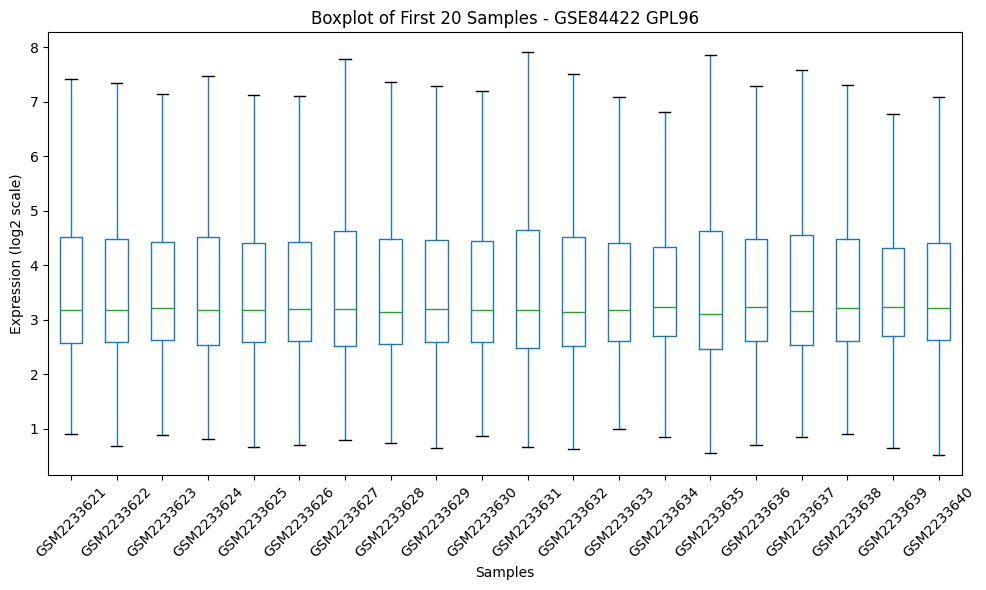

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load expression data with probe IDs as index
expr_df = pd.read_csv("/content/drive/MyDrive/Gene_Exp_Data.csv", index_col=0)

# Transpose: rows = samples, columns = probes
df_t = expr_df.transpose()

# Keep only first 20 samples (i.e., first 20 rows)
df_t_subset = df_t.iloc[:20]

# Plot boxplot: one box per sample
plt.figure(figsize=(10, 6))
df_t_subset.transpose().boxplot(
    rot=45,
    grid=False,
    showfliers=False
)
plt.title("Boxplot of First 20 Samples - GSE84422 GPL96")
plt.ylabel("Expression (log2 scale)")
plt.xlabel("Samples")
plt.tight_layout()
plt.show()


The above graph tells that :
The spread and center of expression values across samples look quite similar.

This suggests no major normalization issues or technical outliers in the first 20 samples.

The boxes are nearly aligned, meaning gene expression distribution is comparable across samples which is a a good sign.

Plot for all samples in GEO

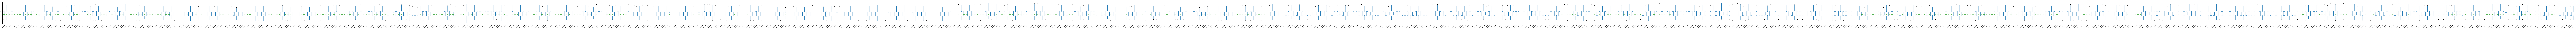

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/GSE84422_GPL96_expression_data.csv'
# Load expression data with probe IDs as index
expression_data = pd.read_csv(file_path, index_col=0)

# Transpose: rows = samples, columns = probes
df_t = expression_data.transpose()

# Keep only first 20 samples (i.e., first 20 rows)
#df_t_subset = df_t.iloc[:20]

# Plot boxplot: one box per sample
plt.figure(figsize=(500, 6))
df_t.transpose().boxplot(
    rot=45,
    grid=False,
    showfliers=False
)
plt.title("Boxplot of all Samples - GSE84422 GPL96")
plt.ylabel("Expression (log2 scale)")
plt.xlabel("Samples")
plt.tight_layout()
plt.show()

# Expression density plot Gene Exp Data

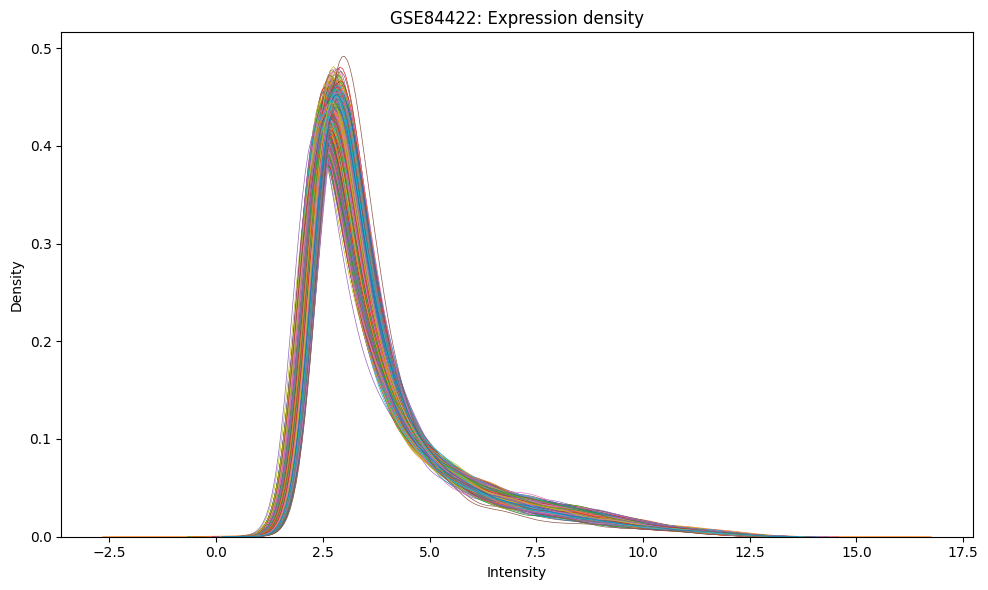

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Transpose so that each sample (column) is plotted
for sample in expr_df.columns:
    sns.kdeplot(expr_df[sample], linewidth=0.5)

plt.title("GSE84422: Expression density")
plt.xlabel("Intensity")
plt.ylabel("Density")
plt.grid(False)
plt.tight_layout()
plt.show()


# Mean variation trend plots

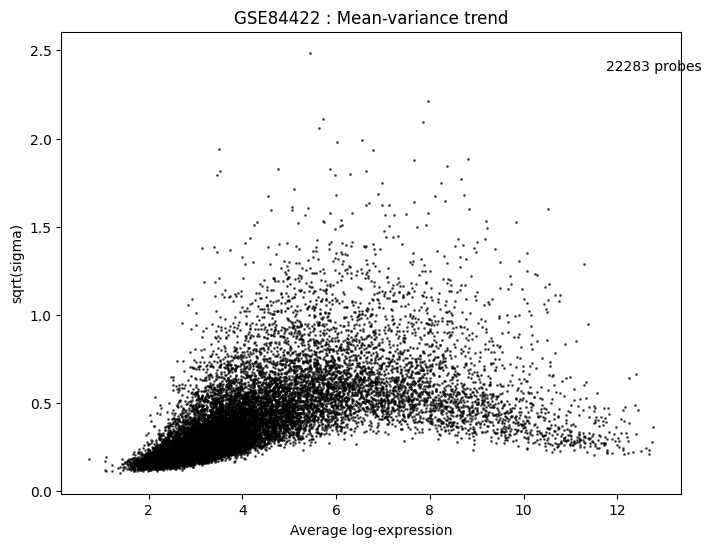

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load expression data: rows = genes/probes, columns = samples
# Data is already log2-transformed!
# expression_data = pd.read_csv("expression_data.csv", index_col=0)
# Load the expression and metadata CSVs
file_path = '/content/drive/MyDrive/GSE84422_GPL96_expression_data.csv'
expression_data = pd.read_csv(file_path, index_col=0) # Load with ID_REF as index
# Calculate average log-expression (mean) and standard deviation (sigma)
mean_log_expr = expression_data.mean(axis=1)
std_log_expr = expression_data.std(axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(mean_log_expr, std_log_expr, s=1, color='black', alpha=0.6)
plt.title("GSE84422 : Mean-variance trend")
plt.xlabel("Average log-expression")
plt.ylabel("sqrt(sigma)")
plt.text(mean_log_expr.max()-1, std_log_expr.max()-0.1, f"{expression_data.shape[0]} probes", fontsize=10)
plt.grid(False)
plt.show()


# UMAP Plot of Dataset
UMAP plot for entire sample without any grouping

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


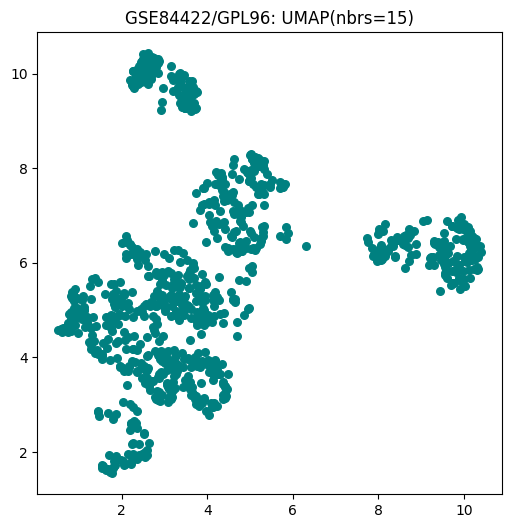

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import StandardScaler

# The'expression_data' is the DataFrame with genes as rows and samples as columns
# and it is already loaded (and optionally filtered)

# Transpose so samples are rows and genes are features
data_t = expr_df.T
data_t.head()
# Scale the data
scaled_data = StandardScaler().fit_transform(data_t)

# UMAP with 15 neighbors
reducer = umap.UMAP(n_neighbors=15, random_state=42)
embedding = reducer.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=30, c='teal')
plt.title("GSE84422/GPL96: UMAP(nbrs=15)")
plt.xlabel('')
plt.ylabel('')
plt.grid(False)
plt.show()

# UMAP Clustering for disease status

UMAP for neuropathological category (seems not a good cluster)

Expression data samples (first 5): ['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at']
Metadata geo_accession (first 5): ['GSM2233621', 'GSM2233622', 'GSM2233623', 'GSM2233624', 'GSM2233625']
Expression data index (first 5): ['GSM2233621', 'GSM2233622', 'GSM2233623', 'GSM2233624', 'GSM2233625']
Metadata index (first 5): ['GSM2233621', 'GSM2233622', 'GSM2233623', 'GSM2233624', 'GSM2233625']


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


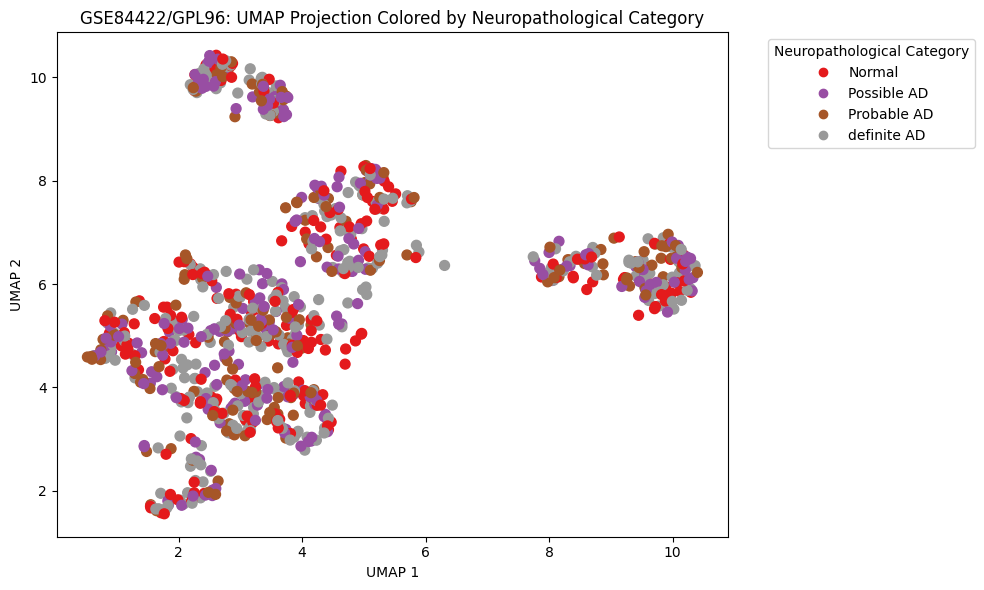

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the expression and metadata CSVs
file_path = '/content/drive/MyDrive/GSE84422_GPL96_expression_data.csv'
expr_df = pd.read_csv(file_path, index_col=0) # Load with ID_REF as index

# Load the metadata file saved previously
meta_df = pd.read_csv("/content/drive/MyDrive/geo_accession_and_all_characteristics.csv")

# Transpose expression data so samples are rows and genes are features
expr_df_T = expr_df.T

# Check sample names in both dataframes
print("Expression data samples (first 5):", expr_df.index[:5].tolist())
print("Metadata geo_accession (first 5):", meta_df['geo_accession'][:5].tolist())

# Align metadata with expression data using 'geo_accession'
# Assuming 'geo_accession' column in meta_df contains the sample names (GSM IDs)
meta_df = meta_df.set_index('geo_accession')

# Print indices after setting index
print("Expression data index (first 5):", expr_df_T.index[:5].tolist())
print("Metadata index (first 5):", meta_df.index[:5].tolist())


# Check for samples in expression data not in metadata
missing_samples = expr_df_T.index.difference(meta_df.index)
if len(missing_samples) > 0:
    print(f"Warning: {len(missing_samples)} samples in expression data not found in metadata:", missing_samples.tolist())

# Filter expression data to keep only samples present in metadata
expr_df_T_aligned = expr_df_T.loc[meta_df.index.intersection(expr_df_T.index)]
meta_df_aligned = meta_df.loc[expr_df_T_aligned.index]

# Standardize expression data before UMAP
scaled_data = StandardScaler().fit_transform(expr_df_T_aligned)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(scaled_data)

# Extract the 'neuropathological category' for coloring
ad_status = meta_df_aligned['neuropathological category']

# Plot UMAP with colors based on 'neuropathological category'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=ad_status.astype('category').cat.codes, cmap='Set1', s=50)
plt.title("GSE84422/GPL96: UMAP Projection Colored by Neuropathological Category")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")

# Add legend
handles, labels = scatter.legend_elements()
legend_labels = ad_status.astype('category').cat.categories
plt.legend(handles, legend_labels, title="Neuropathological Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Phenotype (Meta data access)



Phenotype (metadata) data access from previous notebook (GEO84422.IPYNB), 84422,96


 saved file

In [ ]:
import pandas as pd

# Load the metadata file
meta_df.to_csv('/content/drive/MyDrive/geo_accession_and_all_characteristics.csv', index=False)

# Display result
print(" Metadata shape shape:", meta_df.shape)
meta_df.head()

 Metadata shape shape: (951, 15)


,geo_accession,subject id,age,Sex,race,postmortem interval minutes,ph,clinical dementia rating,braak neurofibrillary tangle score,neuropathological category,average neuritic plaque density,sum of cerad rating scores in multiple brain regions,sum of neurofibrillary tangles density in multiple brain regions,brain region,tissue
0,GSM2233621,1006,98,female,black,300,6.50,3.0,4,Possible AD,2.48,3,10,Frontal Pole,post-mortem brain
1,GSM2233622,1018,60,male,white,1725,6.76,0.0,0,Normal,0.00,0,0,Frontal Pole,post-mortem brain
2,GSM2233623,1023,92,female,white,115,6.70,3.0,6,definite AD,6.40,9,18,Frontal Pole,post-mortem brain
3,GSM2233624,1027,80,male,white,120,6.37,3.0,6,Probable AD,7.12,15,22,Frontal Pole,post-mortem brain
4,GSM2233625,1039,85,male,white,315,6.90,0.0,2,Normal,0.00,0,4,Frontal Pole,post-mortem brain


Study of metadata properties

In [ ]:
import pandas as pd
meta_df = pd.read_csv("/content/drive/MyDrive/geo_accession_and_all_characteristics.csv")
meta_df.describe()

,subject id,age,postmortem interval minutes,ph,clinical dementia rating,braak neurofibrillary tangle score,average neuritic plaque density,sum of cerad rating scores in multiple brain regions,sum of neurofibrillary tangles density in multiple brain regions
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,620.594111,86.305994,331.212408,6.430831,1.896425,3.616193,8.408274,14.540484,10.374343
std,336.319299,9.023359,288.746808,0.265328,1.643503,1.754066,7.641491,10.430633,8.154091
min,13.000000,60.000000,90.000000,5.700000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,367.000000,83.000000,170.000000,6.200000,0.500000,2.000000,2.720000,5.000000,4.000000
50%,616.000000,87.000000,240.000000,6.400000,2.000000,3.000000,7.160000,15.000000,9.000000
75%,870.000000,92.000000,340.000000,6.600000,3.000000,6.000000,11.040000,21.000000,14.000000
max,2010.000000,103.000000,1870.000000,7.000000,5.000000,6.000000,41.440000,35.000000,35.000000


# Gene exp data extraction for Volcano plot: differential expression analysis (DEA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# extract desirable column in a single file
#merged = pd.concat([table_A['x'], table_B['y']], axis=1)
meta_df = pd.read_csv("/content/drive/MyDrive/geo_accession_and_all_characteristics.csv")
# meta_df_T = meta_df.T
meta_df.head(10)
# print(meta_df_T.head(10))
expr_df = pd.read_csv("/content/drive/MyDrive/Gene_Exp_Data.csv", index_col=0)
# expression_data = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_expression_data.csv", index_col=0) # Load with ID_REF as index
expr_df_T = expr_df.T
# expr_df_T.head()
# print(expression_data.head())
#data_volc = meta_df.head(10)

Print different disease status

In [ ]:
# Print 9th column (AD status from metadata)
meta_df_T = meta_df.T
Category_AD = meta_df_T.iloc[9]
print(Category_AD)
# Assign new column names
# expression_data.columns = new_headers

0      Possible AD
1           Normal
2      definite AD
3      Probable AD
4           Normal
          ...     
946    Probable AD
947    definite AD
948    Probable AD
949    definite AD
950    definite AD
Name: neuropathological category, Length: 951, dtype: object


In [ ]:
# expression_data_T.index = Category_AD
# expression_data_T.to_csv('/content/drive/MyDrive/GSE84422_GPL96_DEA_data.csv')
# expression_data_T.head()

expr_df_T.index = Category_AD
expr_df_T.to_csv('/content/drive/MyDrive/GSE84422_GPL96_DEA_data.csv')
expr_df_T.head()

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
neuropathological category,,,,,,,,,,,,,,,,,,,,,
Possible AD,6.244141,2.904342,2.964129,3.237673,1.830522,2.569345,3.270412,2.511328,2.872239,2.541925,...,2.938263,2.986982,8.701612,11.724409,1.852239,2.389850,2.135159,1.951588,1.734157,1.982428
Normal,5.653405,3.080484,3.056430,3.149935,2.013946,2.539322,3.353614,2.598044,3.195277,2.565015,...,3.124019,3.143194,9.142356,11.703971,1.924460,2.584981,2.122470,1.859685,1.821617,2.099755
definite AD,6.437320,2.779001,3.377981,3.233940,2.013279,2.747362,3.311479,2.651189,3.320735,2.750777,...,2.490816,2.909975,9.081977,11.678328,1.762772,2.637621,2.101596,2.066649,1.724062,2.229394
Probable AD,6.422853,2.807162,2.845889,3.047864,1.958638,2.492102,3.323807,2.434233,2.679098,2.407532,...,2.764792,2.637710,9.301181,11.852047,1.878324,2.402179,2.133875,1.982431,1.961369,2.072434
Normal,6.164218,2.833527,2.992403,3.067565,2.041814,2.579532,3.228061,2.576368,2.975454,2.942743,...,3.064465,2.824164,9.923939,11.959846,1.824833,2.488558,2.108344,1.793914,1.739782,2.035197


In [ ]:
print(expr_df_T.shape)

(951, 22283)


In [ ]:
DEA_data = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_DEA_data.csv")
print("DEA_data", DEA_data.shape)
DEA_data.head()

DEA_data (951, 22284)


,neuropathological category,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,Possible AD,6.244141,2.904342,2.964129,3.237673,1.830522,2.569345,3.270412,2.511328,2.872239,...,2.938263,2.986982,8.701612,11.724409,1.852239,2.389850,2.135159,1.951588,1.734157,1.982428
1,Normal,5.653405,3.080484,3.056430,3.149935,2.013946,2.539322,3.353614,2.598044,3.195277,...,3.124019,3.143194,9.142356,11.703971,1.924460,2.584981,2.122470,1.859685,1.821617,2.099755
2,definite AD,6.437320,2.779001,3.377981,3.233940,2.013279,2.747362,3.311479,2.651189,3.320735,...,2.490816,2.909975,9.081977,11.678328,1.762772,2.637621,2.101596,2.066649,1.724062,2.229394
3,Probable AD,6.422853,2.807162,2.845889,3.047864,1.958638,2.492102,3.323807,2.434233,2.679098,...,2.764792,2.637710,9.301181,11.852047,1.878324,2.402179,2.133875,1.982431,1.961369,2.072434
4,Normal,6.164218,2.833527,2.992403,3.067565,2.041814,2.579532,3.228061,2.576368,2.975454,...,3.064465,2.824164,9.923939,11.959846,1.824833,2.488558,2.108344,1.793914,1.739782,2.035197


In [ ]:
DEA_data.tail()

,neuropathological category,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
946,Probable AD,7.330111,2.995143,3.273814,3.091054,2.525235,3.136843,3.294575,2.799969,3.397671,...,3.353218,3.144487,9.439154,11.880368,1.972926,2.397524,2.255419,2.137370,1.838136,2.426555
947,definite AD,7.496691,2.922016,2.940993,3.350699,2.639734,3.115725,3.710293,3.084882,4.159936,...,3.363554,3.404033,10.105928,12.180112,2.132447,2.846372,2.339310,2.081947,1.783559,2.604619
948,Probable AD,7.203152,3.049264,3.257931,3.256248,2.661962,2.822602,3.331471,2.652715,3.272237,...,2.980670,3.011841,8.831202,11.672718,2.011408,2.529674,2.198951,1.950983,1.808129,2.247805
949,definite AD,7.346058,2.771694,3.382064,3.161031,2.736718,2.875379,3.800396,2.820011,3.893239,...,2.827254,3.117954,10.033212,12.101191,2.016371,2.979901,2.376516,2.293960,1.731958,2.368817
950,definite AD,7.855318,2.901678,3.615420,3.459296,2.633985,2.958748,3.309133,2.855739,3.293667,...,2.609882,3.291273,9.183426,11.494731,2.065454,2.658832,2.301948,1.893041,1.916581,2.621822


# Extracrting Data for Normal and definite AD status only

Normal vs definite Differential Expression analysis DEA (Volcano plot)

In [ ]:
import pandas as pd


DEA_data = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_DEA_data.csv", index_col=0)
# df = pd.read_csv("/content/drive/MyDrive/FILENAME.csv", index_col=0)
# Keep only samples from 'Normal' and 'Definite AD'
DEA_filter_AD = DEA_data[DEA_data.index.isin(['Normal', 'definite AD'])]
DEA_filter_AD.to_csv("/content/drive/MyDrive/DEA_filter_AD.csv")

DEA_filter_AD.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
neuropathological category,,,,,,,,,,,,,,,,,,,,,
Normal,5.653405,3.080484,3.056430,3.149935,2.013946,2.539322,3.353614,2.598044,3.195277,2.565015,...,3.124019,3.143194,9.142356,11.703971,1.924460,2.584981,2.122470,1.859685,1.821617,2.099755
definite AD,6.437320,2.779001,3.377981,3.233940,2.013279,2.747362,3.311479,2.651189,3.320735,2.750777,...,2.490816,2.909975,9.081977,11.678328,1.762772,2.637621,2.101596,2.066649,1.724062,2.229394
Normal,6.164218,2.833527,2.992403,3.067565,2.041814,2.579532,3.228061,2.576368,2.975454,2.942743,...,3.064465,2.824164,9.923939,11.959846,1.824833,2.488558,2.108344,1.793914,1.739782,2.035197
Normal,6.953710,2.922033,2.861960,2.830232,1.844887,2.784494,3.505814,2.400622,3.302525,2.834204,...,3.644538,2.782663,9.650028,11.812223,1.934592,2.434882,2.053826,1.839083,1.828281,2.076241
definite AD,6.680138,2.811398,3.006744,3.238549,2.050475,2.634464,3.250803,2.430922,2.980809,2.577010,...,2.796759,2.630960,8.934018,11.684237,1.983640,2.457218,2.161208,1.832112,1.727274,1.958900


In [ ]:
print(DEA_filter_AD.shape)
# now only 542 sample are only Definite of normal

(542, 22283)


Find transpose of Gene Exp Data

In [ ]:
# This format (transpose) is needed for applying the t-test gene by gene
DEA_filter_AD_T = DEA_filter_AD.T

print(DEA_filter_AD_T)
DEA_filter_AD.head()


neuropathological category    Normal  definite AD    Normal    Normal  \
1007_s_at                   5.653405     6.437320  6.164218  6.953710   
1053_at                     3.080484     2.779001  2.833527  2.922033   
117_at                      3.056430     3.377981  2.992403  2.861960   
121_at                      3.149935     3.233940  3.067565  2.830232   
1255_g_at                   2.013946     2.013279  2.041814  1.844887   
...                              ...          ...       ...       ...   
AFFX-ThrX-5_at              2.584981     2.637621  2.488558  2.434882   
AFFX-ThrX-M_at              2.122470     2.101596  2.108344  2.053826   
AFFX-TrpnX-3_at             1.859685     2.066649  1.793914  1.839083   
AFFX-TrpnX-5_at             1.821617     1.724062  1.739782  1.828281   
AFFX-TrpnX-M_at             2.099755     2.229394  2.035197  2.076241   

neuropathological category  definite AD    Normal  definite AD  definite AD  \
1007_s_at                      6.680138  6.0

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
neuropathological category,,,,,,,,,,,,,,,,,,,,,
Normal,5.653405,3.080484,3.056430,3.149935,2.013946,2.539322,3.353614,2.598044,3.195277,2.565015,...,3.124019,3.143194,9.142356,11.703971,1.924460,2.584981,2.122470,1.859685,1.821617,2.099755
definite AD,6.437320,2.779001,3.377981,3.233940,2.013279,2.747362,3.311479,2.651189,3.320735,2.750777,...,2.490816,2.909975,9.081977,11.678328,1.762772,2.637621,2.101596,2.066649,1.724062,2.229394
Normal,6.164218,2.833527,2.992403,3.067565,2.041814,2.579532,3.228061,2.576368,2.975454,2.942743,...,3.064465,2.824164,9.923939,11.959846,1.824833,2.488558,2.108344,1.793914,1.739782,2.035197
Normal,6.953710,2.922033,2.861960,2.830232,1.844887,2.784494,3.505814,2.400622,3.302525,2.834204,...,3.644538,2.782663,9.650028,11.812223,1.934592,2.434882,2.053826,1.839083,1.828281,2.076241
definite AD,6.680138,2.811398,3.006744,3.238549,2.050475,2.634464,3.250803,2.430922,2.980809,2.577010,...,2.796759,2.630960,8.934018,11.684237,1.983640,2.457218,2.161208,1.832112,1.727274,1.958900


# Creating lables for disease status

 Create labels for  two groups
 0 for normal, 1 for definite AD

In [ ]:
import numpy as np

group_labels = DEA_filter_AD.index.values  # ['Normal', 'Normal', 'definite AD', ...]
# print(group_labels)
labels = np.array([1 if g == 'definite AD' else 0 for g in group_labels])
print(labels)

[0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 

In [ ]:
DEA_filter_AD_T.head()

neuropathological category,Normal,definite AD,Normal,Normal,definite AD,Normal,definite AD,definite AD,definite AD,definite AD,...,Normal,definite AD,definite AD,definite AD,Normal,Normal,definite AD,definite AD,definite AD,definite AD
1007_s_at,5.653405,6.437320,6.164218,6.953710,6.680138,6.086687,6.339690,6.372853,6.804960,6.385586,...,7.306930,7.142701,7.527478,7.349968,6.909441,7.509668,7.380815,7.496691,7.346058,7.855318
1053_at,3.080484,2.779001,2.833527,2.922033,2.811398,3.032132,2.999817,2.844120,2.984593,3.032329,...,3.365351,3.183617,3.130507,3.168944,3.096992,2.971002,3.073465,2.922016,2.771694,2.901678
117_at,3.056430,3.377981,2.992403,2.861960,3.006744,2.990829,2.881743,3.013365,3.140270,2.767784,...,3.322114,3.482716,3.167970,3.284610,3.014100,2.961252,3.218902,2.940993,3.382064,3.615420
121_at,3.149935,3.233940,3.067565,2.830232,3.238549,2.885515,2.999798,3.313124,3.468661,3.091335,...,2.907153,2.945710,3.405747,3.181376,3.412049,3.288946,3.881092,3.350699,3.161031,3.459296
1255_g_at,2.013946,2.013279,2.041814,1.844887,2.050475,2.270307,2.012695,2.096656,2.279087,1.948138,...,2.752871,2.511263,2.653053,2.628929,3.061073,2.641343,2.685187,2.639734,2.736718,2.633985


# Finding p_values and fold change

In [ ]:
from scipy.stats import ttest_ind

p_values = []
logFC = []

for gene in DEA_filter_AD_T.index:
    group1 = DEA_filter_AD_T.loc[gene, labels == 0]
    #expression values of one gene across Normal samples.
    group2 = DEA_filter_AD_T.loc[gene, labels == 1]
 #group2 selects the row(s) for gene from DEA_filter_AD_T and keeps only the columns where labels equals 1.
 # the above code are iteration based, hence storing values as PanadaSeries (not data frame)
 # printing head results in one series

    mean1 = group1.mean()
    mean2 = group2.mean()
#by default computes the mean column-wise (axis=0).


    # logFC.append(np.log2(mean2 + 1e-6) - np.log2(mean1 + 1e-6))  # already log2 transformed
    logFC.append(mean2 - mean1)

    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    p_values.append(p_val)


print(mean1.shape)
print(mean2.shape)


()
()


Showing the p_values and logFC for each gene

coding for dea_results_new

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

results = []  # to store results for each gene

for gene in DEA_filter_AD_T.index:
    group1 = DEA_filter_AD_T.loc[gene, labels == 0]  # Normal
    group2 = DEA_filter_AD_T.loc[gene, labels == 1]  # Definite AD

    mean1 = group1.mean()
    mean2 = group2.mean()

    log_fc = mean2 - mean1  # already log2 transformed
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

    results.append([gene, mean1, mean2, log_fc, p_val])

# Create DataFrame
dea_results_new = pd.DataFrame(results, columns=["Gene", "Mean_Normal", "Mean_DefiniteAD", "log2FC", "p_value"])

# Optional: sort by p-value
# dea_results = dea_results.sort_values(by="p_value")

# View top rows
print(dea_results_new.head())



        Gene  Mean_Normal  Mean_DefiniteAD    log2FC   p_value
0  1007_s_at     6.634350         6.710442  0.076093  0.103122
1    1053_at     3.046890         3.014326 -0.032564  0.031426
2     117_at     3.159125         3.189642  0.030517  0.213855
3     121_at     3.194790         3.205823  0.011033  0.578771
4  1255_g_at     2.140025         2.165894  0.025869  0.256988


In [ ]:
print(mean2.shape)
#Saving as DataFrame

# dea_results.to_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD.csv", index=False)
# print(mean1.shape)
# print(mean2.shape)
DEA_filter_AD_T.loc[:, labels == 0].head()
# group1_T = group1.T
# print(group2.head())
# print(group1.shape)
# print(group2.shape)
# group1.head()

()


neuropathological category,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
1007_s_at,5.653405,6.164218,6.953710,6.086687,6.495616,5.954874,5.836418,6.598666,6.426018,6.304631,...,7.293479,7.741144,6.634171,6.465672,6.758552,7.310431,7.326416,7.306930,6.909441,7.509668
1053_at,3.080484,2.833527,2.922033,3.032132,3.121456,2.684929,2.997862,2.804751,2.686595,3.087657,...,2.918515,3.044633,3.269185,3.334927,3.230568,2.817198,3.103231,3.365351,3.096992,2.971002
117_at,3.056430,2.992403,2.861960,2.990829,3.148408,2.792258,2.866004,3.130175,3.125480,2.985827,...,3.778211,3.198773,3.069166,3.110073,3.164522,3.391819,2.949323,3.322114,3.014100,2.961252
121_at,3.149935,3.067565,2.830232,2.885515,3.177813,3.103553,2.999182,3.077512,3.279320,3.079471,...,3.354169,3.478875,3.140922,3.234285,3.018098,3.318425,3.086399,2.907153,3.412049,3.288946
1255_g_at,2.013946,2.041814,1.844887,2.270307,2.084129,1.994993,2.050962,2.009037,2.041337,2.064841,...,2.136581,2.020573,3.244779,2.771158,2.395930,2.551548,2.709722,2.752871,3.061073,2.641343


Sorting based on values calculated

In [ ]:
# Sort by p-value for FDR correction

# dea_results_new = dea_results_new.sort_values('p_value').reset_index(drop=True)

# Benjamini-Hochberg adjustment
n = len(dea_results_new)
dea_results_new['adj_pval'] = dea_results_new['p_value'] * n / (np.arange(1, n+1))
dea_results_new['adj_pval'] = dea_results_new['adj_pval'].clip(upper=1)  # p-values can't exceed 1

# Add -log10 p-value for volcano plot
dea_results_new['-log10(pval)'] = -np.log10(dea_results_new['p_value'])

# Save to CSV
dea_results_new.to_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD_new.csv", index=False)


# View first few rows
print(dea_results_new.head(10))

# Originally, 1007_s_at was just first in the index order (probably from the raw GEO file order).
# After sorting, genes with strongest statistical significance (lowest p_value,or highest FDR) are moved to the top, that is why we now see 214414_x_at instead.
dea_results_new[dea_results_new['Gene'] == '1007_s_at']

        Gene  Mean_Normal  Mean_DefiniteAD    log2FC   p_value  adj_pval  \
0  1007_s_at     6.634350         6.710442  0.076093  0.103122       1.0   
1    1053_at     3.046890         3.014326 -0.032564  0.031426       1.0   
2     117_at     3.159125         3.189642  0.030517  0.213855       1.0   
3     121_at     3.194790         3.205823  0.011033  0.578771       1.0   
4  1255_g_at     2.140025         2.165894  0.025869  0.256988       1.0   
5    1294_at     2.774630         2.763309 -0.011321  0.522177       1.0   
6    1316_at     3.374203         3.387130  0.012927  0.535916       1.0   
7    1320_at     2.604668         2.604083 -0.000586  0.973138       1.0   
8  1405_i_at     3.392892         3.269502 -0.123390  0.003981       1.0   
9    1431_at     2.638965         2.628514 -0.010451  0.467929       1.0   

   -log10(pval)  
0      0.986647  
1      1.502717  
2      0.669880  
3      0.237493  
4      0.590086  
5      0.282182  
6      0.270903  
7      0.011826  
8

,Gene,Mean_Normal,Mean_DefiniteAD,log2FC,p_value,adj_pval,-log10(pval)
0,1007_s_at,6.63435,6.710442,0.076093,0.103122,1.0,0.986647


Saving the results obtained by

In [ ]:
# import pandas as pd
# dea_results = pd.DataFrame({
#     'Gene': DEA_filter_AD_T.index,
#     'log2FC': logFC,
#     'p_value': p_values
# })

# dea_results.to_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD.csv", index=False)
# # print(dea_results.head())


# # Adjust p-values using Benjamini-Hochberg (FDR)
# dea_results['adj_pval'] = dea_results['p_value'] * len(dea_results) / (np.arange(1, len(dea_results)+1))
# dea_results = dea_results.sort_values('p_value')
# dea_results['-log10(pval)'] = -np.log10(dea_results['p_value'])
# dea_results.head()

,Gene,log2FC,p_value,adj_pval,-log10(pval)
13792,214414_x_at,-0.937668,5.477275e-28,8.848700e-28,27.261435
11144,211745_x_at,-0.965558,9.617223e-27,1.922841e-26,26.016950
8950,209458_x_at,-1.041576,1.093585e-26,2.722417e-26,25.961147
3544,204018_x_at,-0.995249,1.562127e-26,9.819145e-26,25.806284
8609,209116_x_at,-1.077934,6.337123e-25,1.640071e-24,24.198108


# Volcano plot from the values obtained above

Volcano plot using dea_results_new

In [ ]:
!pip install adjustText

In [ ]:
# import numpy as np
import pandas as pd
dea_results_new = pd.read_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD_new.csv")
# dea_results_new.head(10)
# Sort by p-value to get top 10 significant genes
dea_results_new.sort_values('p_value').head(10)

,Gene,Mean_Normal,Mean_DefiniteAD,log2FC,p_value,adj_pval,-log10(pval)
13792,214414_x_at,11.046035,10.108367,-0.937668,5.477275e-28,8.848700e-28,27.261435
11144,211745_x_at,11.332549,10.366991,-0.965558,9.617223e-27,1.922841e-26,26.016950
8950,209458_x_at,11.079262,10.037685,-1.041576,1.093585e-26,2.722417e-26,25.961147
3544,204018_x_at,11.352517,10.357268,-0.995249,1.562127e-26,9.819145e-26,25.806284
8609,209116_x_at,10.922899,9.844965,-1.077934,6.337123e-25,1.640071e-24,24.198108
16778,217414_x_at,10.542510,9.557834,-0.984677,3.039986e-24,4.037190e-24,23.517128
11096,211696_x_at,11.071306,10.153295,-0.918010,2.160067e-23,4.337459e-23,22.665533
11099,211699_x_at,10.331658,9.338021,-0.993637,2.771353e-23,5.563428e-23,22.557308
16598,217232_x_at,10.678577,9.657988,-1.020588,1.049589e-21,1.409000e-21,20.978981
14855,215483_at,2.624995,2.338924,-0.286072,1.215031e-17,1.822465e-17,16.915413


              Gene  Mean_Normal  Mean_DefiniteAD    log2FC       p_value  \
2440     202912_at     4.544032         4.020758 -0.523274  7.083181e-08   
2445   202917_s_at     6.236057         4.941776 -1.294281  5.374700e-08   
3061     203535_at     4.001157         3.442685 -0.558472  4.819218e-08   
3441     203915_at     3.133724         2.601159 -0.532565  4.953722e-05   
3544   204018_x_at    11.352517        10.357268 -0.995249  1.562127e-26   
4238     204712_at     6.488995         5.914523 -0.574471  4.195886e-08   
4574   205048_s_at     4.689643         5.264577  0.574934  5.121127e-08   
4756     205230_at     7.230718         6.526478 -0.704240  2.579149e-10   
7094   207574_s_at     5.775121         5.260242 -0.514879  4.508416e-07   
7657   208151_x_at     4.132544         4.713903  0.581359  2.613840e-10   
8213   208719_s_at     3.473449         3.998648  0.525200  5.216163e-10   
8540     209047_at     5.797472         6.359418  0.561946  1.068206e-04   
8609   20911

/tmp/ipython-input-4263715648.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dea_results_new['log2FC'],


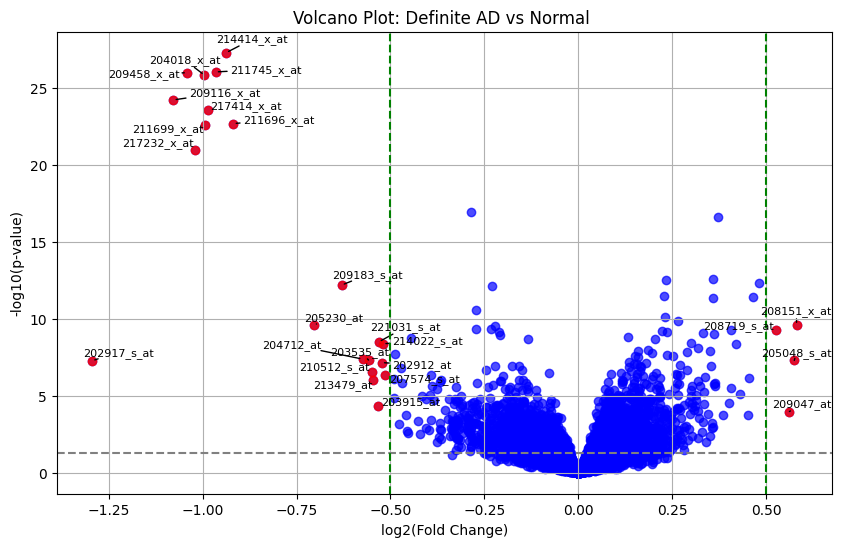

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text



dea_results_new = pd.read_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD_new.csv")

# Sort by p-value to get top 10 significant genes
# top10 = dea_results_new.sort_values('p_value').head(10)
# Filter for significance and effect size
filtered = dea_results_new[
    (abs(dea_results_new['log2FC']) > 0.5) &
    (dea_results_new['adj_pval'] < 0.05)
]


print(filtered)

plt.figure(figsize=(10,6))
plt.scatter(dea_results_new['log2FC'],
            dea_results_new['-log10(pval)'],
            color='blue',
            # c=(dea_results_new['adj_pval'] < 0.05),
            cmap='coolwarm',
            alpha=0.7
)
###################
# Highlight DEGs
plt.scatter(filtered['log2FC'], filtered['-log10(pval)'],
            color='red', alpha=0.8, label='|log2FC|>0.5 & FDR<0.05')
##################

plt.axhline(-np.log10(0.05), color='grey', linestyle='--') # -Log10(0.05) = 1.3, p = 0.05)
plt.axvline(0.5, color='green', linestyle='--')
plt.axvline(-0.5, color='green', linestyle='--')

# Label top 10 significant genes

# Use filtered genes instead of top10
texts = []
for _, row in filtered.iterrows():
    texts.append(
        plt.text(
            row['log2FC'],
            row['-log10(pval)'],
            row['Gene'],  # or row['Gene Symbol'] if merged with annotation
            fontsize=8,
            ha='center',
            va='bottom'
        )
    )
# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))
plt.title("Volcano Plot: Definite AD vs Normal ")
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.grid(True)
plt.show()


**Useful Deatils of Volcano plots:**

Axes:
X-axis (log2(Fold Change)):
Measures the magnitude and direction of change.
Left (−): Downregulated genes in Definite AD.
Right (+): Upregulated genes in Definite AD.
Vertical green lines at ±1 show 2-fold change thresholds.
Y-axis (−log10(p-value)):
Measures statistical significance.
The higher the point, the smaller the p-value (i.e., more significant).
The horizontal dashed line typically marks p = 0.05 → −log10(0.05) ≈ 1.3.

**Points:**
Red dots: Genes with p-value < 0.05
Blue dots: Genes with p-value ≥ 0.05
Only the red dots outside the green vertical lines are both:
Statistically significant (p < 0.05), and
Biologically significant (|log2FC| > 1)
These are your most interesting differentially expressed genes (DEGs).

**Points:**
Red dots: Genes with p-value < 0.05
Blue dots: Genes with p-value ≥ 0.05
Only the red dots outside the green vertical lines are both:
Statistically significant (p < 0.05), and
Biologically significant (|log2FC| > 1)
These are the most interesting differentially expressed genes (DEGs).

In [ ]:
dea_results_new.to_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD_new.csv", index=False)
print("Max log2FC:", dea_results_new["log2FC"].max())
print("Min log2FC:", dea_results_new["log2FC"].min())
print("Max -log10(p-value):", (-np.log10(dea_results_new["p_value"])).max())

Max log2FC: 0.5813588691454861
Min log2FC: -1.294281219817928
Max -log10(p-value): 27.261435470089765


Annotation data for Probe ID, Gene Symbol, and others..

In [ ]:
import pandas as pd

# Read uploaded file with some changes
annotation_data = pd.read_csv(
    "/content/drive/MyDrive/GPL96-57554_annot.txt",
    sep='\t',
    comment='#'
)

# Save file with another name (without index column)
annotation_data.to_csv(
    "/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv",
    index=False
)

# If want it later, load it as 'annot':
# annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")

In [ ]:
# Load the saved annotation file
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
annot_prob_Gene_ID = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
print(annot_prob_Gene_ID.head(20))
# Display the top 20 rows
# print(annot.head(20))
annot[annot['ID'] == '204151_x_at']

           ID             Gene Symbol      ENTREZ_GENE_ID
0   1007_s_at        DDR1 /// MIR4640   780 /// 100616237
1     1053_at                    RFC2                5982
2      117_at                   HSPA6                3310
3      121_at                    PAX8                7849
4   1255_g_at                  GUCA1A                2978
5     1294_at        MIR5193 /// UBA7  7318 /// 100847079
6     1316_at                    THRA                7067
7     1320_at                  PTPN21               11099
8   1405_i_at                    CCL5                6352
9     1431_at                  CYP2E1                1571
10    1438_at                   EPHB3                2049
11    1487_at                   ESRRA                2101
12  1494_f_at                  CYP2A6                1548
13  1598_g_at                    GAS6                2621
14  160020_at                   MMP14                4323
15    1729_at                   TRADD                8717
16    1773_at 

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
3677,204151_x_at,NM_001353,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,gb:NM_001353.2 /DEF=Homo sapiens aldo-keto red...,NM_001353,"aldo-keto reductase family 1, member C1",AKR1C1,1645,NM_001353,0001523 // retinoid metabolic process // trace...,0005737 // cytoplasm // inferred from electron...,0004032 // alditol:NADP+ 1-oxidoreductase acti...


In [ ]:
print(annot_prob_Gene_ID.tail(20))

                             ID Gene Symbol ENTREZ_GENE_ID
22263      AFFX-r2-Ec-bioB-5_at         NaN            NaN
22264      AFFX-r2-Ec-bioB-M_at         NaN            NaN
22265      AFFX-r2-Ec-bioC-3_at         NaN            NaN
22266      AFFX-r2-Ec-bioC-5_at         NaN            NaN
22267      AFFX-r2-Ec-bioD-3_at         NaN            NaN
22268      AFFX-r2-Ec-bioD-5_at         NaN            NaN
22269  AFFX-r2-Hs18SrRNA-3_s_at         NaN            NaN
22270    AFFX-r2-Hs18SrRNA-5_at         NaN            NaN
22271  AFFX-r2-Hs18SrRNA-M_x_at         NaN            NaN
22272    AFFX-r2-Hs28SrRNA-3_at         NaN            NaN
22273    AFFX-r2-Hs28SrRNA-5_at         NaN            NaN
22274    AFFX-r2-Hs28SrRNA-M_at         NaN            NaN
22275       AFFX-r2-P1-cre-3_at         NaN            NaN
22276       AFFX-r2-P1-cre-5_at         NaN            NaN
22277            AFFX-ThrX-3_at         NaN            NaN
22278            AFFX-ThrX-5_at         NaN            N

In [ ]:
import pandas as pd
expr_df = pd.read_csv("/content/drive/MyDrive/Gene_Exp_Data.csv", index_col=0)
# expression_data = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_expression_data.csv", index_col=0)
print("Expression matrix shape:", expr_df.shape)
expr_df.tail(5)

Expression matrix shape: (22283, 951)


,GSM2233621,GSM2233622,GSM2233623,GSM2233624,GSM2233625,GSM2233626,GSM2233627,GSM2233628,GSM2233629,GSM2233630,...,GSM2234562,GSM2234563,GSM2234564,GSM2234565,GSM2234566,GSM2234567,GSM2234568,GSM2234569,GSM2234570,GSM2234571
ID_REF,,,,,,,,,,,,,,,,,,,,,
AFFX-ThrX-5_at,2.389850,2.584981,2.637621,2.402179,2.488558,2.487004,2.424321,2.434882,2.457218,2.609548,...,2.446111,2.456453,2.611190,2.423294,2.625193,2.397524,2.846372,2.529674,2.979901,2.658832
AFFX-ThrX-M_at,2.135159,2.122470,2.101596,2.133875,2.108344,2.278490,2.347897,2.053826,2.161208,2.147390,...,2.165248,2.100176,2.277544,2.090200,2.219860,2.255419,2.339310,2.198951,2.376516,2.301948
AFFX-TrpnX-3_at,1.951588,1.859685,2.066649,1.982431,1.793914,1.734267,1.935042,1.839083,1.832112,2.356474,...,1.736739,1.849158,1.732624,1.792079,2.036954,2.137370,2.081947,1.950983,2.293960,1.893041
AFFX-TrpnX-5_at,1.734157,1.821617,1.724062,1.961369,1.739782,1.822385,1.790875,1.828281,1.727274,1.934224,...,1.846590,1.781381,1.710768,1.797493,2.130597,1.838136,1.783559,1.808129,1.731958,1.916581
AFFX-TrpnX-M_at,1.982428,2.099755,2.229394,2.072434,2.035197,2.020079,2.020660,2.076241,1.958900,2.349560,...,2.070435,2.091335,2.144947,2.218419,2.270334,2.426555,2.604619,2.247805,2.368817,2.621822


In [ ]:
import pandas as pd
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
# annot_prob_Gene_ID = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]

dea_results_new = pd.read_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD_new.csv")
# Merge DEA results with annotation data after mapping
merged = dea_results_new.merge(annot, left_on="Gene", right_on="ID", how="left")

# Keep only genes that meet the thresholds
filtered_merged = merged[
    (abs(merged['log2FC']) > 0.5) &
    (merged['adj_pval'] < 0.05)
]
# "ENTREZ_GENE_ID"
# Print the filtered merged data
print(filtered_merged[['Gene', 'Gene Symbol','ENTREZ_GENE_ID', 'log2FC', 'p_value', 'adj_pval']])


              Gene    Gene Symbol ENTREZ_GENE_ID    log2FC       p_value  \
2440     202912_at            ADM            133 -0.523274  7.083181e-08   
2445   202917_s_at         S100A8           6279 -1.294281  5.374700e-08   
3061     203535_at         S100A9           6280 -0.558472  4.819218e-08   
3441     203915_at          CXCL9           4283 -0.532565  4.953722e-05   
3544   204018_x_at  HBA1 /// HBA2  3039 /// 3040 -0.995249  1.562127e-26   
4238     204712_at           WIF1          11197 -0.574471  4.195886e-08   
4574   205048_s_at           PSPH           5723  0.574934  5.121127e-08   
4756     205230_at          RPH3A          22895 -0.704240  2.579149e-10   
7094   207574_s_at        GADD45B           4616 -0.514879  4.508416e-07   
7657   208151_x_at          DDX17          10521  0.581359  2.613840e-10   
8213   208719_s_at          DDX17          10521  0.525200  5.216163e-10   
8540     209047_at           AQP1            358  0.561946  1.068206e-04   
8609   20911

Remove only duplicate genes AND KEEP IMP DATA

In [ ]:
import pandas as pd
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
# annot_prob_Gene_ID = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]

dea_results_new = pd.read_csv("/content/drive/MyDrive/DEA_Normal_vs_DefiniteAD_new.csv")
# Merge DEA results with annotation data after mapping
merged = dea_results_new.merge(annot, left_on="Gene", right_on="ID", how="left")

# Keep only genes that meet the thresholds
filtered_merged = merged[
    (abs(merged['log2FC']) > 0.5) &
    (merged['adj_pval'] < 0.05)
]
# "ENTREZ_GENE_ID"
# Print the filtered merged data
# print(filtered_merged)
# print(filtered_merged[['Gene Symbol','ENTREZ_GENE_ID', 'log2FC', 'p_value', 'adj_pval']])

# Remove duplicate genes based on 'Gene Symbol'
filtered_unique = filtered_merged.drop_duplicates(subset=['Gene Symbol'], keep='first')

# Display the cleaned dataframe
filtered_unique_all_data = filtered_unique[['Gene Symbol', 'ENTREZ_GENE_ID', 'log2FC', 'p_value', 'adj_pval']]
print(filtered_unique_all_data)
#sig_genes_df.to_csv('/content/drive/MyDrive/signi_genes.csv', index=False)
filtered_unique_all_data.to_csv('/content/drive/MyDrive/filtered_unique_all_data.csv', index=False)
# sig_genes_all_info = filtered_merged[['Gene Symbol','ENTREZ_GENE_ID', 'log2FC', 'p_value', 'adj_pval']].dropna().unique().tolist()
# print(sig_genes_all_info)

         Gene Symbol ENTREZ_GENE_ID    log2FC       p_value      adj_pval
2440             ADM            133 -0.523274  7.083181e-08  6.465978e-07
2445          S100A8           6279 -1.294281  5.374700e-08  4.896338e-07
3061          S100A9           6280 -0.558472  4.819218e-08  3.507075e-07
3441           CXCL9           4283 -0.532565  4.953722e-05  3.206967e-04
3544   HBA1 /// HBA2  3039 /// 3040 -0.995249  1.562127e-26  9.819145e-26
4238            WIF1          11197 -0.574471  4.195886e-08  2.205636e-07
4574            PSPH           5723  0.574934  5.121127e-08  2.494297e-07
4756           RPH3A          22895 -0.704240  2.579149e-10  1.208139e-09
7094         GADD45B           4616 -0.514879  4.508416e-07  1.415941e-06
7657           DDX17          10521  0.581359  2.613840e-10  7.605666e-10
8540            AQP1            358  0.561946  1.068206e-04  2.786892e-04
8609             HBB           3043 -1.077934  6.337123e-25  1.640071e-24
8676        C10orf10          11067 -0

List of signifcant genes obtained from DEA

In [ ]:
import pandas as pd
# Use Gene Symbol column, drop duplicates & NaN
sig_genes = filtered_merged['Gene Symbol'].dropna().unique().tolist()

# Convert the list to a DataFrame
sig_genes_df = pd.DataFrame(sig_genes, columns=["Gene Volcano"])

# Save to CSV in drive
sig_genes_df.to_csv('/content/drive/MyDrive/signi_genes.csv', index=False)
# meta_df.to_csv('/content/drive/MyDrive/geo_accession_and_all_characteristics.csv', index=False)
print("Significant genes saved to drive as 'signi_genes'.csv'")

print(f"Number of significant genes: {len(sig_genes)}")
print(sig_genes)  # Preview first 10


Significant genes saved to drive as 'signi_genes'.csv'
Number of significant genes: 17
['ADM', 'S100A8', 'S100A9', 'CXCL9', 'HBA1 /// HBA2', 'WIF1', 'PSPH', 'RPH3A', 'GADD45B', 'DDX17', 'AQP1', 'HBB', 'C10orf10', 'VEGFA', 'NPTX2', 'IFITM1', 'APOLD1']


# UMAP plot for Normal and definite AD only

Missing genes: []


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


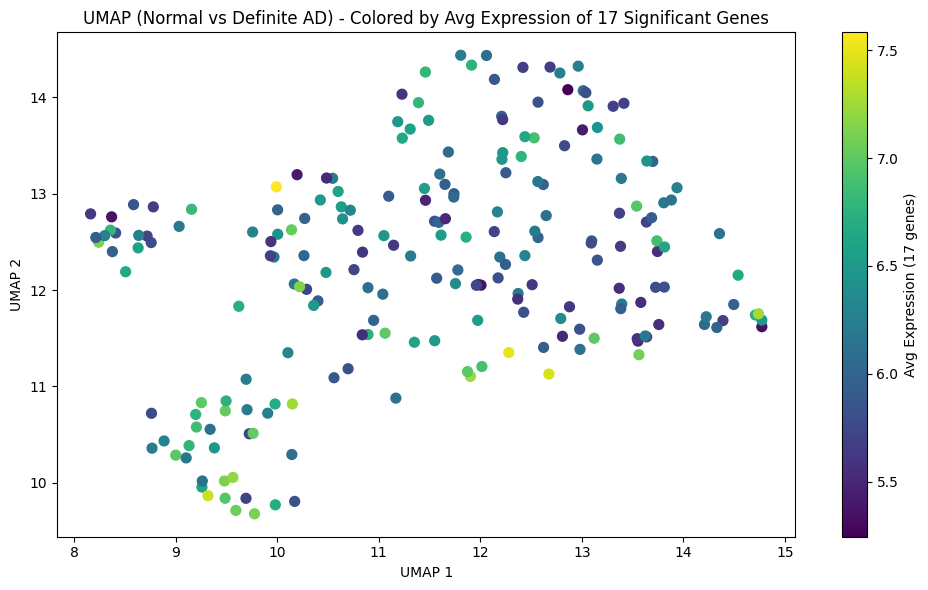

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load expression and metadata
expr_df = pd.read_csv('/content/drive/MyDrive/GSE84422_GPL96_expression_data.csv', index_col=0)
meta_df = pd.read_csv("/content/drive/MyDrive/geo_accession_and_all_characteristics.csv")

# Transpose expression data (samples as rows)
expr_df_T = expr_df.T

# Set geo_accession as index
meta_df = meta_df.set_index('geo_accession')

# Align expression with metadata
expr_df_T_aligned = expr_df_T.loc[expr_df_T.index.intersection(meta_df.index)]
meta_df_aligned = meta_df.loc[expr_df_T_aligned.index]

# Filter only Normal and Definite AD samples
mask = meta_df_aligned['neuropathological category'].isin(['Normal', 'Definite AD'])
expr_df_filtered = expr_df_T_aligned[mask]
meta_df_filtered = meta_df_aligned[mask]

# Highlighting expression of 17 significant genes

# List of 17 significant genes (probe IDs from volcano plot, replace with actual if different)
sig_genes = [
    "202912_at", "202917_s_at", "203535_at", "203915_at", "204018_x_at", "204712_at",
    "205048_s_at", "205230_at", "207574_s_at", "208151_x_at", "208719_s_at", "209047_at",
    "209116_x_at", "209183_s_at", "210512_s_at", "211696_x_at", "213479_at"
]

# Check which of these genes are in the expression data
available_genes = [g for g in sig_genes if g in expr_df_filtered.columns]
missing_genes = list(set(sig_genes) - set(available_genes))
print(f"Missing genes: {missing_genes}")

# Calculate average expression per sample for significant genes
sig_expr = expr_df_filtered[available_genes]
avg_sig_expr = sig_expr.mean(axis=1)

# Scale expression data
scaled_data = StandardScaler().fit_transform(expr_df_filtered)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(scaled_data)

# Plot with color representing average expression of significant genes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=avg_sig_expr, cmap='viridis', s=50)
plt.title("UMAP (Normal vs Definite AD) - Colored by Avg Expression of 17 Significant Genes")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
cbar = plt.colorbar(scatter)
cbar.set_label("Avg Expression (17 genes)")
plt.tight_layout()
plt.show()


In [ ]:
# ACCESS SIGNIFICANT GENES
sig_genes = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
sig_genes_df = pd.DataFrame(sig_genes, columns=["Gene Volcano"])
# print(sig_genes)
print(sig_genes_df)

     Gene Volcano
0             ADM
1          S100A8
2          S100A9
3           CXCL9
4   HBA1 /// HBA2
5            WIF1
6            PSPH
7           RPH3A
8         GADD45B
9           DDX17
10           AQP1
11            HBB
12       C10orf10
13          VEGFA
14          NPTX2
15         IFITM1
16         APOLD1


# Random forest analysis
To find rank list of the genes using random forest, and then finding intersection of genes with Volcano Genes

In [ ]:
# DEA_data = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_DEA_data.csv", index_col=0)
# # df = pd.read_csv("/content/drive/MyDrive/FILENAME.csv", index_col=0)
# # Keep only samples from 'Normal' and 'Definite AD'
# DEA_filter_AD = DEA_data[DEA_data.index.isin(['Normal', 'definite AD'])]
# DEA_filter_AD.to_csv("/content/drive/MyDrive/DEA_filter_AD.csv")

# DEA_filter_AD.head()


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
# -------------------------------
# 1. Load data
# -------------------------------
data = pd.read_csv("/content/drive/MyDrive/DEA_filter_AD.csv", index_col=0)

# Separate labels (first column) and features (all gene columns)
y = data.index   # 'Normal' or 'definite AD'
X1 = data.values  # all gene expression values #unfiltered

##############################################################

gene_names = data.columns

print("Initial dataset size:", X1.shape)  # (samples, genes)

# -------------------------------
# 2. Filter low-variance genes
# -------------------------------
# This removes genes with very low variance
selector = VarianceThreshold(threshold=0.0)  # adjust threshold if needed
X = selector.fit_transform(X1)
filtered_gene_names = gene_names[selector.get_support()]

print("Dataset size after filtering:", X.shape)

# -------------------------------
# 3. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#############################################################
# -------------------------------
# 2. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 252
# -------------------------------
# 3. Train Random Forest
# -------------------------------
# rf = RandomForestClassifier(
#     n_estimators=100,
#     random_state=42,
#     n_jobs=-1,
#     class_weight="balanced"
# )
rf = RandomForestClassifier(
    n_estimators=252,
    random_state=42,
    min_samples_leaf = 4,
    min_samples_split = 10,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

# -------------------------------
# 4. Evaluate
# -------------------------------
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# -------------------------------
# 5. Feature importance
# -------------------------------
importances = rf.feature_importances_
gene_names = data.columns  # gene IDs from columns

gene_importances = pd.DataFrame({
    "Gene": gene_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(gene_importances)
# 6. Load annotation and merge
# -------------------------------
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")

# Keep only relevant columns
annot = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
# So after this line, annot is a slimmed-down dataframe with just these three columns.
# The merge is done with:
# left_on="Gene" → use the "Gene" column from gene_importances
# right_on="ID" → match with "ID" column from annot
# how="left" → keep all rows from gene_importances even if some genes don’t have a matching annotation. For those without a match, the "Gene Symbol" and "ENTREZ_GENE_ID" will be NaN.
importance_annot = gene_importances.merge(
    annot,
    left_on="Gene",   # from gene_importances
    right_on="ID",    # from annotation
    how="left"
)

# Save results
importance_annot.to_csv("/content/drive/MyDrive/gene_ranking_randomforest.csv", index=False)

print("Top 50 important genes:")
print(importance_annot.head(50))


Initial dataset size: (542, 22283)
Dataset size after filtering: (542, 22283)
Accuracy: 0.8440366972477065
              Gene  Importance
11144  211745_x_at    0.010123
11099  211699_x_at    0.008169
8950   209458_x_at    0.005830
3544   204018_x_at    0.005811
13792  214414_x_at    0.005498
...            ...         ...
10117  210653_s_at    0.000000
10116  210652_s_at    0.000000
10115  210651_s_at    0.000000
10114  210650_s_at    0.000000
1469   201942_s_at    0.000000

[22283 rows x 2 columns]
Top 20 important genes:
           Gene  Importance           ID        Gene Symbol     ENTREZ_GENE_ID
0   211745_x_at    0.010123  211745_x_at      HBA1 /// HBA2      3039 /// 3040
1   211699_x_at    0.008169  211699_x_at      HBA1 /// HBA2      3039 /// 3040
2   209458_x_at    0.005830  209458_x_at      HBA1 /// HBA2      3039 /// 3040
3   204018_x_at    0.005811  204018_x_at      HBA1 /// HBA2      3039 /// 3040
4   214414_x_at    0.005498  214414_x_at      HBA1 /// HBA2      3039 /// 30

Hyper parameter tuning to refine the results from Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import randint

data = pd.read_csv("/content/drive/MyDrive/DEA_filter_AD.csv", index_col=0)

# Separate labels (first column) and features (all gene columns)
y = data.index   # 'Normal' or 'definite AD'
X = data.values  # all gene expression values #unfiltered
# -------------------------------
# 1. Split Data
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# -------------------------------
# 2. Define Hyperparameter Space
# -------------------------------
param_dist = {
    'n_estimators': randint(50, 300),
    # 'max_depth': randint(1, 5)  # 'None' is not added
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    # "max_features": ["sqrt", "log2", None],
    # "bootstrap": [True, False]


}

# -------------------------------
# 3. Randomized Search
# -------------------------------
rf = RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,              # try 10 random combinations
    cv=5,                   # 5-fold cross validation
    scoring="f1_macro",     # metric can be changed
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

# -------------------------------
# 4. Evaluate Best Model
# -------------------------------
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
# Best Parameters: {'max_depth': 3, 'n_estimators': 229}

##############################################################
# Fitting 5 folds for each of 5 candidates, totalling 25 fits
# Best Parameters: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 252}
# Accuracy: 0.8440366972477065
############################################################

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 252}
Accuracy: 0.8440366972477065


Cross validation 4 fold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/DEA_filter_AD.csv", index_col=0)

# Separate labels (first column) and features (all gene columns)
y = data.index   # 'Normal' or 'definite AD'
X = data.values  # all gene expression values #unfiltered
 # Cross validation
rf = RandomForestClassifier(n_estimators=252, random_state=42, min_samples_leaf = 4, min_samples_split = 10) #'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 252
scores = cross_val_score(rf, X, y, cv=5)  # 5-fold CV
print("Mean accuracy:", scores.mean())


Mean accuracy: 0.7839959225280327


# Plotting confusion matrix and confusion heatmap plots using the results of Random Forest

Classification Report:

              precision    recall  f1-score   support

      Normal       0.96      0.63      0.76        43
 definite AD       0.80      0.98      0.88        66

    accuracy                           0.84       109
   macro avg       0.88      0.81      0.82       109
weighted avg       0.87      0.84      0.84       109


Confusion Matrix:

[[27 16]
 [ 1 65]]


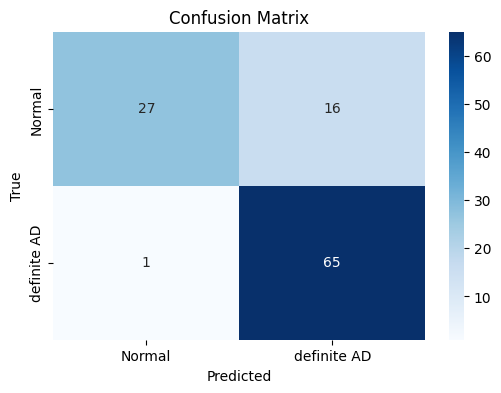

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming y_test are true labels and y_pred are predictions
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal","definite AD"], yticklabels=["Normal","definite AD"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

DEG list

In [ ]:
# sig_genes_df.to_csv('/content/drive/MyDrive/signi_genes.csv', index=False)

SIGN_gene = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
print(SIGN_gene)

     Gene Volcano
0             ADM
1          S100A8
2          S100A9
3           CXCL9
4   HBA1 /// HBA2
5            WIF1
6            PSPH
7           RPH3A
8         GADD45B
9           DDX17
10           AQP1
11            HBB
12       C10orf10
13          VEGFA
14          NPTX2
15         IFITM1
16         APOLD1


# Genes intersection
From volcano genes to Random forest high ranked genes (Top 100)

We got 10 common genes from DEG and RF

In [ ]:
import pandas as pd

SIGN_gene = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
print(SIGN_gene)
# SIGN_gene = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
importance_annot = pd.read_csv("/content/drive/MyDrive/gene_ranking_randomforest.csv")
importance_annot_top = importance_annot.head(int(100)) # for top 1% write int(22283 * 0.01)
# Get unique genes from each dataframe
genes1 = set(SIGN_gene['Gene Volcano'].dropna().unique())
genes2 = set(importance_annot_top['Gene Symbol'].dropna().unique())

# Find common genes
common_genes = sorted(genes1.intersection(genes2))

print(f"Number of common genes: {len(common_genes)}")
print(common_genes[:20])  # Preview first 20

# list to datafram
common_genes_df = pd.DataFrame(common_genes, columns=["DEG_and_RF"])
# Save to CSV
common_genes_df.to_csv("/content/drive/MyDrive/DEG_and_RF.csv", index=False)
print(common_genes_df)

     Gene Volcano
0             ADM
1          S100A8
2          S100A9
3           CXCL9
4   HBA1 /// HBA2
5            WIF1
6            PSPH
7           RPH3A
8         GADD45B
9           DDX17
10           AQP1
11            HBB
12       C10orf10
13          VEGFA
14          NPTX2
15         IFITM1
16         APOLD1
Number of common genes: 10
['APOLD1', 'C10orf10', 'DDX17', 'GADD45B', 'HBA1 /// HBA2', 'HBB', 'IFITM1', 'NPTX2', 'PSPH', 'RPH3A']
      DEG_and_RF
0         APOLD1
1       C10orf10
2          DDX17
3        GADD45B
4  HBA1 /// HBA2
5            HBB
6         IFITM1
7          NPTX2
8           PSPH
9          RPH3A


# Support Vector Machine Analysis
**To filter out more reliable gene biomarkers**

Using SVM as a disease condition predictor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

############################################

# DEA_data = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_DEA_data.csv", index_col=0)
# df = pd.read_csv("/content/drive/MyDrive/FILENAME.csv", index_col=0)
# Keep only samples from 'Normal' and 'Definite AD'
# DEA_filter_AD = DEA_data[DEA_data.index.isin(['Normal', 'definite AD'])]
DEA_filter_AD = pd.read_csv("/content/drive/MyDrive/DEA_filter_AD.csv",index_col=0)

DEA_filter_AD.head()

###########################################

# Assuming we already have DEA_filter_AD
X = DEA_filter_AD.values          # expression matrix
y = DEA_filter_AD.index.values    # labels: 'Normal' or 'definite AD'

# gene_names = DEA_filter_AD.columns


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear SVM
# C (Regularization Parameter)
# Controls how much SVM tolerates misclassification.
# High C (e.g., 100) → Model tries to classify every point correctly → tighter boundaries, risk of overfitting.
# Low C (e.g., 0.01) → Allows some misclassifications → smoother boundary, better generalization.
clf = SVC(kernel="linear", C=50, class_weight="balanced", random_state=42)
# clf = SVC(kernel="linear", C=1, probability=True, random_state=42)
clf.fit(X_train, y_train)

print("Test Accuracy:", clf.score(X_test, y_test))
# Test Accuracy: 0.7431192660550459

Test Accuracy: 0.7431192660550459


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

scores = cross_val_score(clf, scaler.fit_transform(X), y, cv=5)
print("Mean CV Accuracy:", scores.mean())

Confusion matrix

Accuracy: 0.7431192660550459
              precision    recall  f1-score   support

      Normal       0.61      0.95      0.75        43
 definite AD       0.95      0.61      0.74        66

    accuracy                           0.74       109
   macro avg       0.78      0.78      0.74       109
weighted avg       0.82      0.74      0.74       109



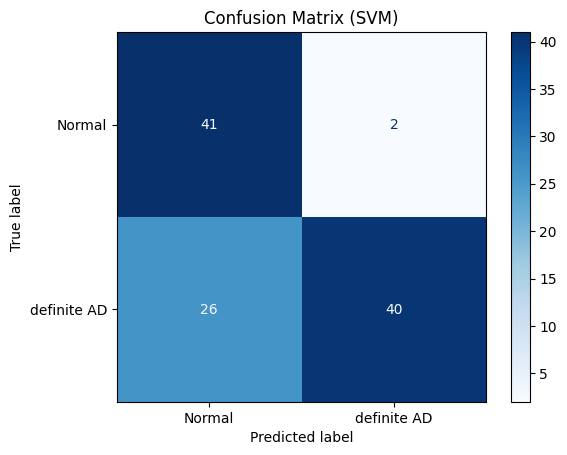

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (SVM)")
plt.show()

# Genes from SVM

Ranking genes on the basis of their weights

In [ ]:
# Extract weights from linear SVM
coef = np.ravel(clf.coef_)

# Gene rankings
gene_importance_SVM = pd.DataFrame({
    "Gene": gene_names,
    "Weight": coef,
    "AbsWeight": np.abs(coef)
}).sort_values(by="AbsWeight", ascending=False)

# print(gene_importance_SVM)
##############################################################
# Annotation data
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
# print(annot)
# Keep only relevant columns
annot = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
# So after this line, annot is a slimmed-down dataframe with just these three columns.

# importance_annot = gene_importances.merge(
#     annot,
#     left_on="Gene",   # from gene_importances
#     right_on="ID",    # from annotation
#     how="left"
# )
# The merge is done with:
# left_on="Gene" → use the "Gene" column from gene_importances
# right_on="ID" → match with "ID" column from annot
# how="left" → keep all rows from gene_importances even if some genes don’t have a matching annotation. For those without a match, the "Gene Symbol" and "ENTREZ_GENE_ID" will be NaN.
importance_annot_SVM = gene_importance_SVM.merge(
    annot,
    left_on="Gene",   # from gene_importances
    right_on="ID",    # from annotation
    how="left"
)

# Save also
importance_annot_SVM.to_csv("/content/drive/MyDrive/gene_importance_SVM.csv", index=False)

print("Top 50 important genes:")
print(importance_annot_SVM.head(50))
############################################################


Top 20 important genes:
           Gene    Weight  AbsWeight           ID                 Gene Symbol  \
0   205033_s_at -0.015641   0.015641  205033_s_at  DEFA1 /// DEFA1B /// DEFA3   
1     222315_at -0.013813   0.013813    222315_at                LOC100996756   
2     218507_at -0.011243   0.011243    218507_at                      HILPDA   
3     217757_at  0.011032   0.011032    217757_at                         A2M   
4   203374_s_at  0.010221   0.010221  203374_s_at                        TPP2   
5     202912_at -0.010217   0.010217    202912_at                         ADM   
6   213396_s_at -0.010082   0.010082  213396_s_at                      AKAP10   
7   214414_x_at -0.009744   0.009744  214414_x_at               HBA1 /// HBA2   
8     210729_at -0.009664   0.009664    210729_at                       NPY2R   
9   209116_x_at -0.009643   0.009643  209116_x_at                         HBB   
10  204018_x_at -0.009630   0.009630  204018_x_at               HBA1 /// HBA2   
11  

# **Gene intersection from DEG and SVM**
Intersection of high ranked genes from SVM (Top 100)
We got 7 intersected genes (now 8)

['ADM', 'C10orf10', 'DDX17', 'HBA1 /// HBA2', 'HBB', 'PSPH', 'VEGFA']

In [ ]:
# Top 100 genes
import pandas as pd
SIGN_gene = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
# top_SVM_genes = gene_importance_SVM.head(10)

annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
# Keep only relevant columns
annot = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
#############################################################

#The merge is done with:
# left_on="Gene" → use the "Gene" column from gene_importances
# right_on="ID" → match with "ID" column from annot
# how="left" → keep all rows from gene_importances even if some genes don’t have a matching annotation.
# For those without a match, the "Gene Symbol" and "ENTREZ_GENE_ID" will be NaN.

# SIGN_gene = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
gene_importance_SVM = pd.read_csv("/content/drive/MyDrive/gene_importance_SVM.csv")
gene_importance_SVM_top = gene_importance_SVM.head(int(100)) # for top 1% write int(22283 * 0.01)
# Get unique genes from each dataframe

genes11 = set(SIGN_gene['Gene Volcano'].dropna().unique())
genes22 = set(gene_importance_SVM_top['Gene Symbol'].dropna().unique())
# print(genes11)
# print(genes22)
# Find common genes
common_genes_SVM = sorted(genes11.intersection(genes22))
# list to datafram
common_genes_SVM_df = pd.DataFrame(common_genes_SVM, columns=["DEG_and_SVM"])
# Save to CSV
common_genes_SVM_df.to_csv("/content/drive/MyDrive/DEG_and_SVM.csv", index=False)
# common_genes
print(f"Number of common genes: {len(common_genes_SVM)}")
print(common_genes_SVM_df)

Number of common genes: 8
     DEG_and_SVM
0            ADM
1       C10orf10
2          DDX17
3        GADD45B
4  HBA1 /// HBA2
5            HBB
6           PSPH
7          RPH3A


# **SVM-RFE**
**(Another method to find high ranked genes)**

Previus SVM could not be improved more!
SVM-RFE (Recursive Feature Elimination), the workflow would be different:
Start with all genes (or after filtering by variance, if dataset is too large).
Train an SVM (usually linear kernel for interpretability).
Rank features by their weights (importance).
Recursively eliminate the least important features.
Repeat until the desired number of genes is selected.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, VarianceThreshold

# --------------------------
# 1. Load Data
# --------------------------
DEA_filter_AD = pd.read_csv("/content/drive/MyDrive/DEA_filter_AD.csv", index_col=0)

# Extract X (features) and y (labels)
X1 = DEA_filter_AD.values           # expression matrix
y = DEA_filter_AD.index.values      # labels: 'Normal' or 'definite AD'
gene_names = DEA_filter_AD.columns  # original gene IDs

print("Original shape:", X1.shape)

# --------------------------
# 2. Filter by variance
# --------------------------
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X1)

# Update gene names after filtering
selected_genes = gene_names[selector.get_support()]

print("After variance filtering:", X.shape)

# --------------------------
# 3. Run Recursive Feature Elimination (SVM-RFE)
# --------------------------
svm = SVC(kernel="linear", C=1, random_state=42)
rfe = RFE(estimator=svm, n_features_to_select=100, step=0.1)  # Select top 20 genes
rfe.fit(X, y)

# --------------------------
# 4. Rank features
# --------------------------
ranking = pd.DataFrame({
    "Gene": selected_genes,
    "Rank": rfe.ranking_
}).sort_values(by="Rank")

print("Top 20 genes from SVM-RFE:")
print(ranking.head(100))



Original shape: (542, 22283)
After variance filtering: (542, 22283)
Top 20 genes from SVM-RFE:
              Gene  Rank
8925   209433_s_at     1
19113    219750_at     1
2440     202912_at     1
2425     202898_at     1
2414   202887_s_at     1
...            ...   ...
8615     209122_at     1
8609   209116_x_at     1
8950   209458_x_at     1
8878     209386_at     1
2273     202746_at     1

[100 rows x 2 columns]


In [ ]:
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
# print(annot)
# Keep only relevant columns
annot = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
# So after this line, annot is a slimmed-down dataframe with just these three columns.

# importance_annot = gene_importances.merge(
#     annot,
#     left_on="Gene",   # from gene_importances
#     right_on="ID",    # from annotation
#     how="left"
# )
# The merge is done with:
# left_on="Gene" → use the "Gene" column from gene_importances
# right_on="ID" → match with "ID" column from annot
# how="left" → keep all rows from gene_importances even if some genes don’t have a matching annotation.
# For those without a match, the "Gene Symbol" and "ENTREZ_GENE_ID" will be NaN.
importance_annot_SVM_RFE = ranking.merge(
    annot,
    left_on="Gene",   # from gene_importances
    right_on="ID",    # from annotation
    how="left"
)

# Save also
importance_annot_SVM_RFE.to_csv("/content/drive/MyDrive/gene_importance_SVM.csv", index=False)

print("Top 20 important genes:")
print(importance_annot_SVM_RFE.head(50))

Top 20 important genes:
           Gene  Rank           ID                 Gene Symbol  \
0   209433_s_at     1  209433_s_at                        PPAT   
1     219750_at     1    219750_at                     TMEM144   
2     202912_at     1    202912_at                         ADM   
3     202898_at     1    202898_at                        SDC3   
4   202887_s_at     1  202887_s_at                       DDIT4   
5   203096_s_at     1  203096_s_at                     RAPGEF2   
6     202589_at     1    202589_at                        TYMS   
7     202581_at     1    202581_at           HSPA1A /// HSPA1B   
8     203138_at     1    203138_at                        HAT1   
9   202554_s_at     1  202554_s_at                       GSTM3   
10  203354_s_at     1  203354_s_at                        PSD3   
11  203336_s_at     1  203336_s_at                    ITGB1BP1   
12  202487_s_at     1  202487_s_at                       H2AFV   
13    203510_at     1    203510_at                  

# Gene intersection from DEG and SVM-RFE

Here we got 8 intersected genes

In [ ]:
# Top 20 genes
import pandas as pd
SIGN_gene = pd.read_csv("/content/drive/MyDrive/signi_genes.csv")
# top_SVM_genes = gene_importance_SVM.head(10)
print()
annot = pd.read_csv("/content/drive/MyDrive/GSE84422_GPL96_Annotation_Data.csv")
# Keep only relevant columns
annot = annot[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
#############################################################
importance_annot_SVM_RFE = pd.read_csv("/content/drive/MyDrive/gene_importance_SVM.csv")

# gene_importance_SVM = pd.read_csv("/content/drive/MyDrive/gene_importance_SVM.csv")
# gene_importance_SVM_top = gene_importance_SVM.head(int(100)) # for top 1% write int(22283 * 0.01)
# Get unique genes from each dataframe

genes11 = set(SIGN_gene['Gene Volcano'].dropna().unique())
genes22 = set(importance_annot_SVM_RFE.head(100)['Gene Symbol'].dropna().unique())
# print(genes11)
# print(genes22)
# Find common genes
common_genes_SVM_RFE = sorted(genes11.intersection(genes22))
# common_genes
print(f"Number of common genes: {len(common_genes_SVM_RFE)}")
# list to dataframe
common_genes_SVM_RFE_df = pd.DataFrame(common_genes_SVM, columns=["DEG_and_SVMRFE"])
# Save to CSV
common_genes_SVM_RFE_df.to_csv("/content/drive/MyDrive/DEG_and_SVMRFE.csv", index=False)
print(common_genes_SVM_RFE)


Number of common genes: 8
['ADM', 'C10orf10', 'DDX17', 'GADD45B', 'HBA1 /// HBA2', 'HBB', 'PSPH', 'RPH3A']
